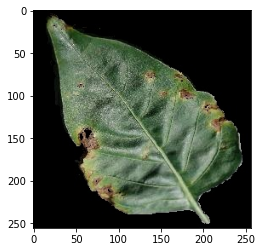

In [8]:
import matplotlib.pyplot as plt
from matplotlib import image as img
image = img.imread('../images/rzlt_image.JPG')
image.shape
plt.imshow(image)

In [9]:
# Step 1 Detect/Extract Image's RGB

import pandas as pd
#construct to a dataframe for future data process
df = pd.DataFrame()
df['r']=pd.Series(image[:,:,0].flatten())
df['g']=pd.Series(image[:,:,1].flatten())
df['b']=pd.Series(image[:,:,2].flatten())
df.head()

,r,g,b
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [10]:
# Step 2 Data Preprocessing
# Whiten to standardise pixel data

from scipy.cluster.vq import whiten

df['r_whiten'] = whiten(df['r'])
df['g_whiten'] = whiten(df['g'])
df['b_whiten'] = whiten(df['b'])
df.head()

,r,g,b,r_whiten,g_whiten,b_whiten
0,0,0,0,0.0,0.0,0.0
1,0,0,0,0.0,0.0,0.0
2,0,0,0,0.0,0.0,0.0
3,0,0,0,0.0,0.0,0.0
4,0,0,0,0.0,0.0,0.0


In [11]:
# Step 3 K-means cluster
# We aim to find 4 main colors from the image ## Assumption cz we
# know about data and our interest to find color other than  green
# based on the problem ##
# [Background, Shades of Green, Anomaly - rust, black spot etc]

from scipy.cluster.vq import kmeans
cluster_centers, distortion = kmeans(df[['r_whiten','g_whiten','b_whiten' ]], 10)
cluster_centers  # Since we want 4 clusters hence 4 cluster_centres for
                 # each r,g,b

# kmeans returns two values cluster_centers and distortions. For our purpose, only cluster_centers value is used.

array([[1.09389161, 1.31733797, 1.04427036],
       [2.9722983 , 2.82583294, 2.99635171],
       [0.64351308, 0.88769439, 0.59150067],
       [0.00906098, 0.0101498 , 0.00697489],
       [2.12710094, 2.18776648, 2.22810476],
       [2.34920375, 2.03076259, 1.65006162],
       [1.48533931, 1.62755598, 1.44985183],
       [2.5242766 , 2.4675577 , 2.53812586],
       [1.79247485, 1.9128423 , 1.8625584 ]])

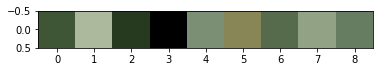

[(63, 86, 54),
 (172, 185, 157),
 (37, 58, 31),
 (0, 0, 0),
 (123, 143, 117),
 (136, 133, 86),
 (86, 106, 76),
 (146, 162, 133),
 (103, 125, 97)]

In [12]:
# Restore R,G,B
# Cluster_center consist of standardized values that will need to restore to the real R, G, B to retrieve the colors.

# imshow could show image either within 0 to 1 float or 0 to 255 int. So we use int() to return the integer values for each cluster center.
# std() returns the standard deviation.

r_std, g_std, b_std = df[['r','g','b']].std()

colors = []

for color in cluster_centers:
    sr,sg,sb = color
    colors.append((int(sr*r_std),int(sg*g_std), int(sb*b_std)))

plt.imshow([colors])
plt.show()
colors